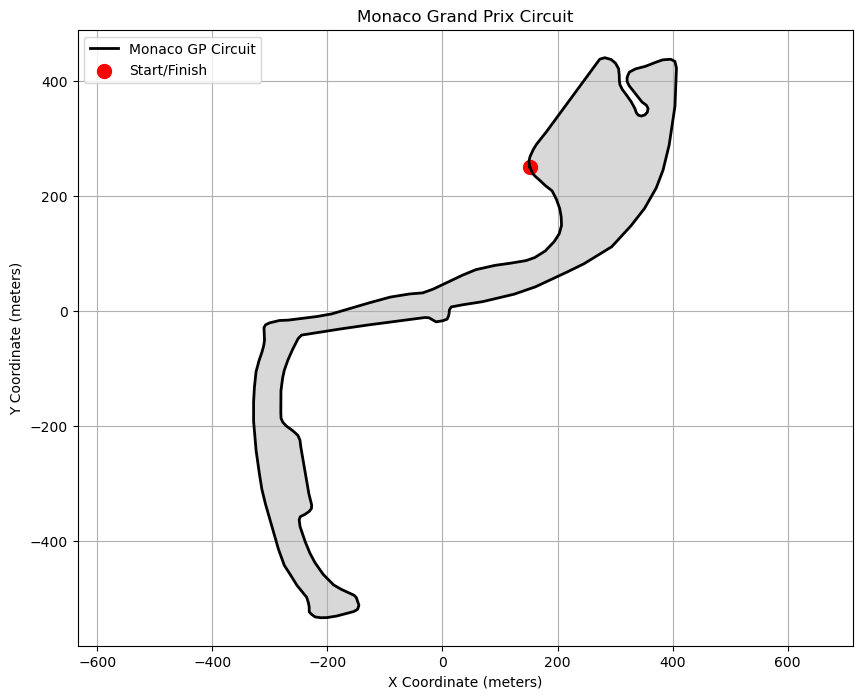

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


# Function to convert latitude and longitude to Cartesian coordinates
def latlon_to_xy(lat, lon, lat0, lon0):
    R = 6371000  # Earth's radius in meters
    x = R * np.radians(lon - lon0) * np.cos(np.radians(lat0))
    y = R * np.radians(lat - lat0)
    return x, y

# Load the GeoJSON data for the Monaco circuit
with open('mc-1929.geojson', 'r') as f:
    geojson_data = json.load(f)

# Extract coordinates from the GeoJSON data
coordinates = geojson_data['features'][0]['geometry']['coordinates']
lons, lats = zip(*coordinates)

# Reference point for coordinate conversion (mean latitude and longitude)
lat0, lon0 = np.mean(lats), np.mean(lons)

# Convert GPS coordinates to Cartesian coordinates
x, y = latlon_to_xy(np.array(lats), np.array(lons), lat0, lon0)

# Plot the Monaco Grand Prix Circuit
plt.figure(figsize=(10, 8))
plt.plot(x, y, 'k-', linewidth=2, label='Monaco GP Circuit')
plt.fill(x, y, 'gray', alpha=0.3)
plt.scatter(x[0], y[0], color='red', s=100, label='Start/Finish')
plt.title('Monaco Grand Prix Circuit')
plt.xlabel('X Coordinate (meters)')
plt.ylabel('Y Coordinate (meters)')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

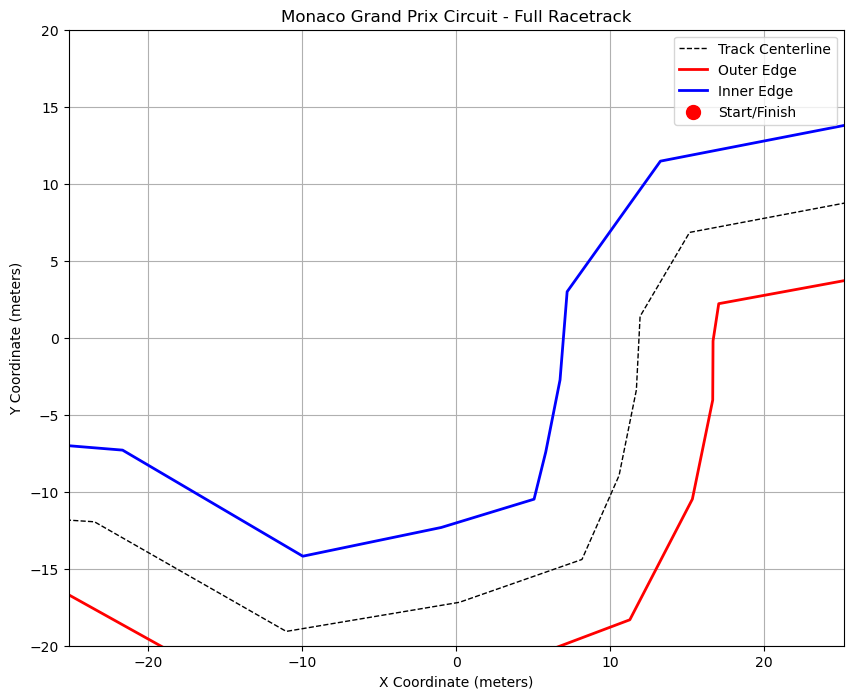

In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Function to convert latitude and longitude to Cartesian coordinates
def latlon_to_xy(lat, lon, lat0, lon0):
    R = 6371000  # Earth's radius in meters
    x = R * np.radians(lon - lon0) * np.cos(np.radians(lat0))
    y = R * np.radians(lat - lat0)
    return x, y

# Function to compute unit perpendicular vectors
def compute_perpendiculars(x, y):
    dx = np.gradient(x)
    dy = np.gradient(y)
    lengths = np.sqrt(dx**2 + dy**2)
    
    # Normalize to unit vectors
    dx /= lengths
    dy /= lengths
    
    # Perpendicular vectors (rotate 90 degrees)
    px = -dy
    py = dx
    
    return px, py

# Load the GeoJSON data for the Monaco circuit
with open('mc-1929.geojson', 'r') as f:
    geojson_data = json.load(f)

# Extract coordinates from the GeoJSON data
coordinates = geojson_data['features'][0]['geometry']['coordinates']
lons, lats = zip(*coordinates)

# Reference point for coordinate conversion (mean latitude and longitude)
lat0, lon0 = np.mean(lats), np.mean(lons)

# Convert GPS coordinates to Cartesian coordinates
x, y = latlon_to_xy(np.array(lats), np.array(lons), lat0, lon0)

# Compute perpendicular vectors
px, py = compute_perpendiculars(x, y)

# Define track width (e.g., 10 meters)
track_width = 10  # Adjust as needed

# Compute inner and outer track boundaries
x_outer = x + (track_width / 2) * px
y_outer = y + (track_width / 2) * py
x_inner = x - (track_width / 2) * px
y_inner = y - (track_width / 2) * py

# Plot the Monaco Grand Prix Circuit with inner and outer edges
plt.figure(figsize=(10, 8))
plt.plot(x, y, 'k--', linewidth=1, label='Track Centerline')
plt.plot(x_outer, y_outer, 'r-', linewidth=2, label='Outer Edge')
plt.plot(x_inner, y_inner, 'b-', linewidth=2, label='Inner Edge')
# plt.fill_betweenx(y, x_inner, x_outer, color='gray', alpha=0.3, label='Track Surface')

plt.scatter(x[0], y[0], color='red', s=100, label='Start/Finish')
plt.title('Monaco Grand Prix Circuit - Full Racetrack')
plt.xlabel('X Coordinate (meters)')
plt.ylabel('Y Coordinate (meters)')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.xlim(-20, 20)
plt.ylim(-20,20)
plt.show()

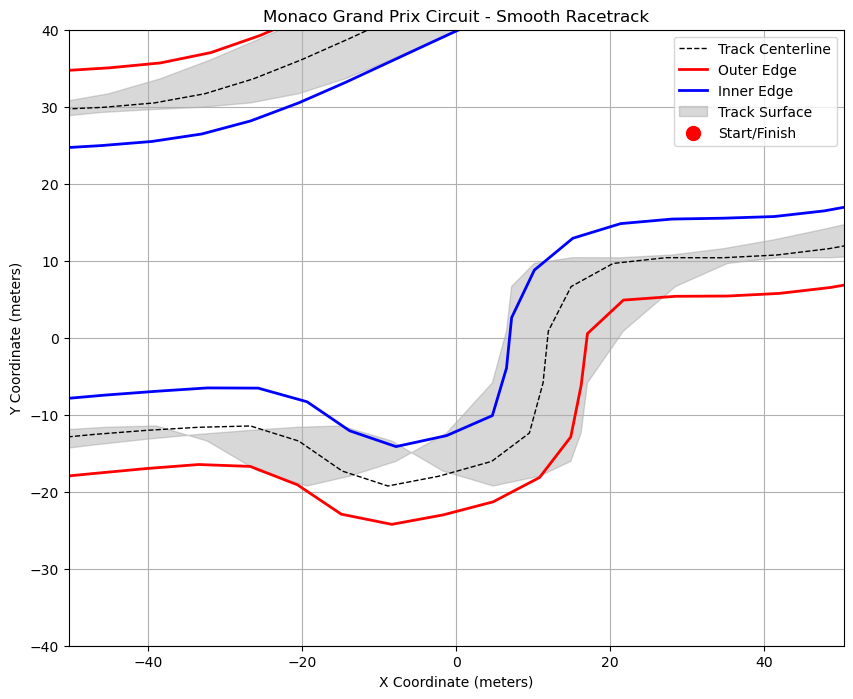

In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

# Function to convert latitude and longitude to Cartesian coordinates
def latlon_to_xy(lat, lon, lat0, lon0):
    R = 6371000  # Earth's radius in meters
    x = R * np.radians(lon - lon0) * np.cos(np.radians(lat0))
    y = R * np.radians(lat - lat0)
    return x, y

# Function to compute perpendicular vectors for track width
def compute_perpendiculars(x, y):
    dx = np.gradient(x)
    dy = np.gradient(y)
    lengths = np.sqrt(dx**2 + dy**2)

    # Normalize to unit vectors
    dx /= lengths
    dy /= lengths

    # Perpendicular vectors (rotate 90 degrees)
    px = -dy
    py = dx

    return px, py

# Function to apply B-spline smoothing
def smooth_curve(x, y, num_points=500, smoothing_factor=0):
    tck, u = splprep([x, y], s=smoothing_factor, per=True)  # Closed loop track
    u_fine = np.linspace(0, 1, num_points)
    x_smooth, y_smooth = splev(u_fine, tck)
    return x_smooth, y_smooth

# Load the GeoJSON data for the Monaco circuit
with open('mc-1929.geojson', 'r') as f:
    geojson_data = json.load(f)

# Extract coordinates from the GeoJSON data
coordinates = geojson_data['features'][0]['geometry']['coordinates']
lons, lats = zip(*coordinates)

# Reference point for coordinate conversion (mean latitude and longitude)
lat0, lon0 = np.mean(lats), np.mean(lons)

# Convert GPS coordinates to Cartesian coordinates
x, y = latlon_to_xy(np.array(lats), np.array(lons), lat0, lon0)

# Smooth the centerline curve
x_smooth, y_smooth = smooth_curve(x, y, num_points=500, smoothing_factor=2)

# Compute perpendicular vectors on the smoothed curve
px, py = compute_perpendiculars(x_smooth, y_smooth)

# Define track width (e.g., 10 meters)
track_width = 10  # Adjust as needed

# Compute inner and outer track boundaries
x_outer = x_smooth + (track_width / 2) * px
y_outer = y_smooth + (track_width / 2) * py
x_inner = x_smooth - (track_width / 2) * px
y_inner = y_smooth - (track_width / 2) * py

# Smooth inner and outer curves
x_outer, y_outer = smooth_curve(x_outer, y_outer, num_points=500, smoothing_factor=2)
x_inner, y_inner = smooth_curve(x_inner, y_inner, num_points=500, smoothing_factor=2)

# Plot the Monaco Grand Prix Circuit with smoothed inner and outer edges
plt.figure(figsize=(10, 8))
plt.plot(x_smooth, y_smooth, 'k--', linewidth=1, label='Track Centerline')
plt.plot(x_outer, y_outer, 'r-', linewidth=2, label='Outer Edge')
plt.plot(x_inner, y_inner, 'b-', linewidth=2, label='Inner Edge')
plt.fill_betweenx(y_smooth, x_inner, x_outer, color='gray', alpha=0.3, label='Track Surface')

plt.scatter(x_smooth[0], y_smooth[0], color='red', s=100, label='Start/Finish')
plt.title('Monaco Grand Prix Circuit - Smooth Racetrack')
plt.xlabel('X Coordinate (meters)')
plt.ylabel('Y Coordinate (meters)')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.xlim(-40, 40)
plt.ylim(-40, 40)
plt.show()

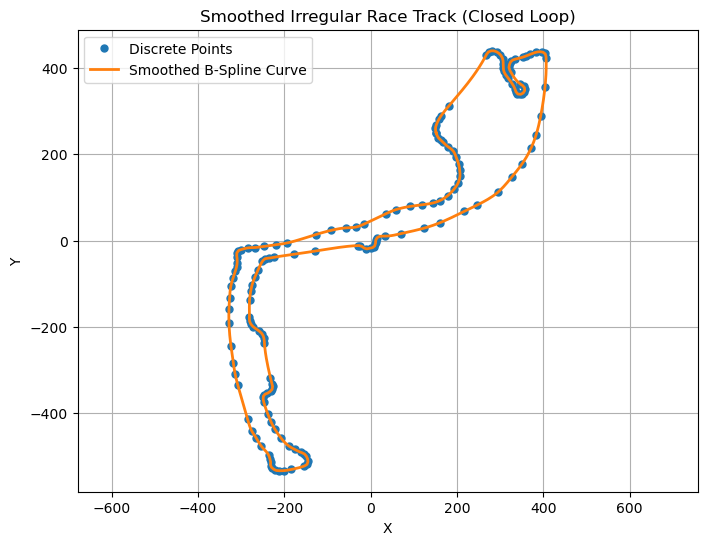

In [5]:
# Irregular loop of points
import json
import numpy as np
import matplotlib.pyplot as plt

# Function to convert latitude and longitude to Cartesian coordinates
def latlon_to_xy(lat, lon, lat0, lon0):
    R = 6371000  # Earth's radius in meters
    x = R * np.radians(lon - lon0) * np.cos(np.radians(lat0))
    y = R * np.radians(lat - lat0)
    return x, y

# Function to compute unit perpendicular vectors
def compute_perpendiculars(x, y):
    dx = np.gradient(x)
    dy = np.gradient(y)
    lengths = np.sqrt(dx**2 + dy**2)
    
    # Normalize to unit vectors
    dx /= lengths
    dy /= lengths
    
    # Perpendicular vectors (rotate 90 degrees)
    px = -dy
    py = dx
    
    return px, py

# Load the GeoJSON data for the Monaco circuit
with open('mc-1929.geojson', 'r') as f:
    geojson_data = json.load(f)

# Extract coordinates from the GeoJSON data
coordinates = geojson_data['features'][0]['geometry']['coordinates']
lons, lats = zip(*coordinates)

# Reference point for coordinate conversion (mean latitude and longitude)
lat0, lon0 = np.mean(lats), np.mean(lons)

# Convert GPS coordinates to Cartesian coordinates
x, y = latlon_to_xy(np.array(lats), np.array(lons), lat0, lon0)


# Apply B-spline interpolation with periodic boundary condition (per=True)
tck, u = splprep([x, y], s=0, per=True)

# Generate smooth points
u_fine = np.linspace(0, 1, 500)
x_smooth, y_smooth = splev(u_fine, tck)

# Plot the smoothed track and the discrete points
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Discrete Points', markersize=5)
plt.plot(x_smooth, y_smooth, '-', label='Smoothed B-Spline Curve', linewidth=2)
plt.title('Smoothed Irregular Race Track (Closed Loop)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

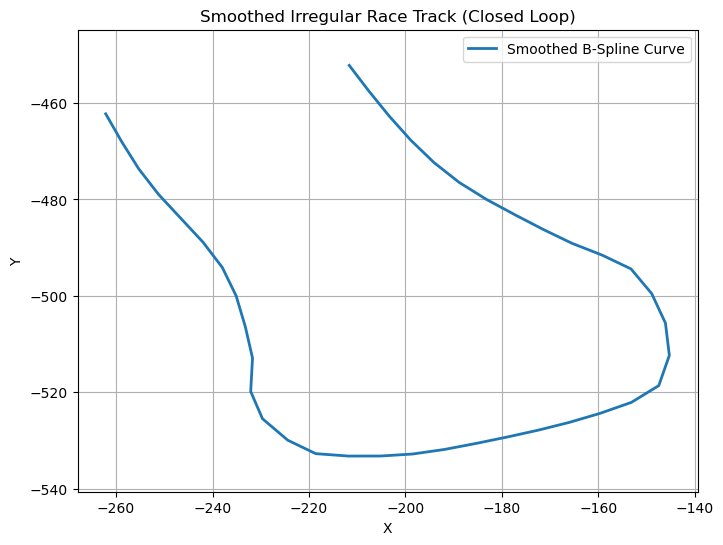

In [16]:
plt.figure(figsize=(8, 6))
# plt.plot(x, y, 'o', label='Discrete Points', markersize=5)
plt.plot(x_smooth[290:330], y_smooth[290:330], '-', label='Smoothed B-Spline Curve', linewidth=2)
plt.title('Smoothed Irregular Race Track (Closed Loop)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In [7]:
t_0 = 0
t_f = 20
t_steps = 20
dt = 1
starting_x = x_smooth[0]
starting_y = y_smooth[0]

def distance_to_center_line(x, y):
    distances = np.sqrt((x_smooth - x)**2 + (y_smooth - y)**2)
    closest_index = np.argmin(distances)
    closest_distance = distances[closest_index]
    return closest_distance, (x_smooth[closest_index], y_smooth[closest_index])

#Define the ode and boundary conditions
def ode_s(t, values, u):
    x, y, v, phi = values
    u_v, u_phi = u
    return np.array([v * np.cos(phi), v * np.sin(phi), v + dt * u_v, phi + dt * u_phi])

def bc(ya, yb, vals):
    x, y, u = vals
    distance, (x_closest, y_closest) = distance_to_center_line(x, y)
    H_tf = 1 + distance**200 + u**2
    return np.array([ya[0] - starting_x, ya[1] - starting_y, ya[2], ya[3], yb[0], yb[1], yb[2], yb[3], H_tf])

# Define the initial guess
solution = solve_ivp(ode_s, (t_0, t_f), [starting_x, starting_y, x_smooth[200], y_smooth[200]], args=([0, 0],), method='RK45', t_eval=np.linspace(t_0, t_f, t_steps))

plt.figure(figsize=(8, 6))
# plt.plot(x_smooth, y_smooth, 'k-', label='Smoothed Track')
plt.plot(solution.y[0], solution.y[1], 'r-', label='Vehicle Trajectory')
plt.scatter(solution.y[0, 0], solution.y[1, 0], color='red', s=100, label='Start')
plt.scatter(solution.y[0, -1], solution.y[1, -1], color='green', s=100, label='Finish')
plt.title('Vehicle Trajectory on Smoothed Track')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

KeyboardInterrupt: 

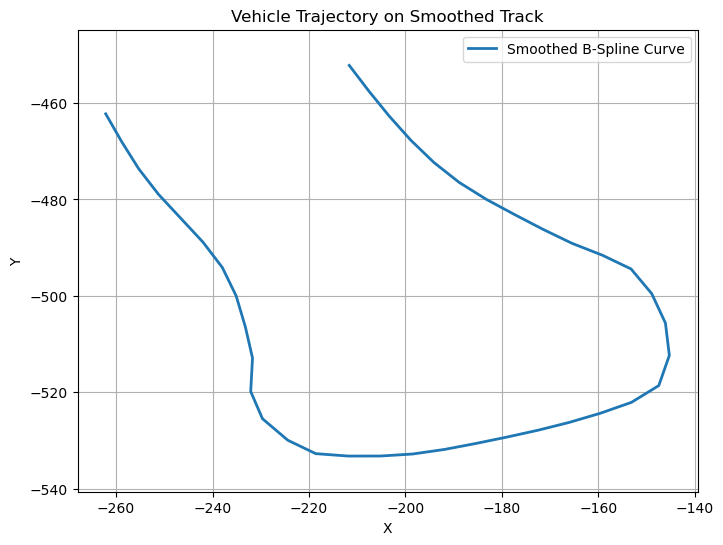

In [34]:

def distance_to_center_line(x, y, x_smooth, y_smooth):
    """Calculate distance to the closest point on the center line"""
    distances = np.sqrt((x_smooth - x)**2 + (y_smooth - y)**2)
    closest_index = np.argmin(distances)
    closest_distance = distances[closest_index]
    return closest_distance, (x_smooth[closest_index], y_smooth[closest_index])

def ode_s(t, values, u):
    """Standard ODE definition for vehicle motion"""
    x, y, v, phi = values
    u_v, u_phi = u
    return np.array([
        v * np.cos(phi),    # dx/dt
        v * np.sin(phi),    # dy/dt
        u_v,                # dv/dt
        u_phi               # dphi/dt
    ])

def bc(ya, yb, vals):
    """Boundary conditions definition"""
    x_smooth, y_smooth, t_0, t_f = vals
    
    # Distance penalty
    distance, (x_closest, y_closest) = distance_to_center_line(ya[0], ya[1], x_smooth, y_smooth)
    
    return np.array([
        ya[0] - x_smooth[290],     # Initial x position
        ya[1] - y_smooth[290],     # Initial y position
        yb[0] - x_smooth[330],   # Final x position
        yb[1] - y_smooth[330],   # Final y position
        ya[2],                  # Initial velocity constraint
        yb[2],                  # Final velocity constraint
        distance**5               # Minimize distance to track
    ])

# Solve parameters
t_0 = 0
t_f = 40
t_steps = 40

# Initial guess using solve_ivp
solution = solve_ivp(
    ode_s, 
    (t_0, t_f), 
    [x_smooth[290], y_smooth[290], 5, 0],  # Initial [x, y, v, phi]
    args=([0, 0],),  # Control inputs
    method='RK45', 
    t_eval=np.linspace(t_0, t_f, t_steps)
)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_smooth[290:330], y_smooth[290:330], '-', label='Smoothed B-Spline Curve', linewidth=2)
# plt.plot(x_smooth, y_smooth, 'k-', label='Smoothed Track')
# plt.plot(solution.y[0], solution.y[1], 'r-', label='Vehicle Trajectory')
# plt.scatter(solution.y[0, 0], solution.y[1, 0], color='red', s=100, label='Start')
# plt.scatter(solution.y[0, -1], solution.y[1, -1], color='green', s=100, label='Finish')
plt.title('Vehicle Trajectory on Smoothed Track')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

/var/folders/nm/jgfv46_n3kg1pc1ltp9d95vm0000gn/T/ipykernel_34284/619161531.py:144: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x_smooth[start_x:end_x], y_smooth[start_x:end_x], '-', label='Track', linewidth=2, color='k', linestyle='--')


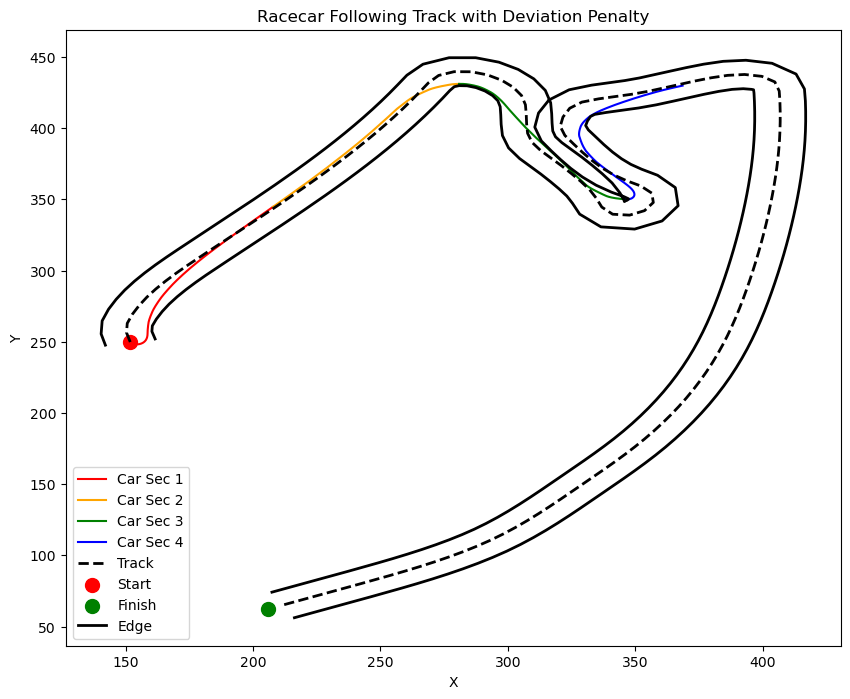

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp

# Define track (x_smooth, y_smooth)
start_x, end_x = 0, 150
t = np.linspace(0, 1, len(x_smooth[start_x:end_x]))
x_interp = interp1d(t, x_smooth[start_x:end_x], kind='cubic')
y_interp = interp1d(t, y_smooth[start_x:end_x], kind='cubic')


# Car parameters
L = 3  # Wheelbase
max_accel = 8  # Max acceleration
max_steer = np.radians(50)  # Max steering angle

def speed_control(x, y, v, base_accel=3.0):
    """
    Adjusts acceleration based on track curvature.

    Parameters:
        x, y: Current vehicle position.
        v: Current velocity.
        base_accel: Desired acceleration level.

    Returns:
        Adjusted acceleration.
    """
    t_vals = np.linspace(0, 1, 100)
    track_points = np.array([x_interp(t_vals), y_interp(t_vals)]).T
    distances = np.linalg.norm(track_points - np.array([x, y]), axis=1)
    closest_idx = np.argmin(distances)

    # Compute curvature (approximate)
    if closest_idx < len(t_vals) - 2:
        p1 = track_points[closest_idx]
        p2 = track_points[closest_idx + 1]
        p3 = track_points[closest_idx + 2]

        # Curvature formula: k = (dx * ddy - dy * ddx) / ((dx^2 + dy^2)^(3/2))
        dx = p2[0] - p1[0]
        dy = p2[1] - p1[1]
        ddx = p3[0] - 2 * p2[0] + p1[0]
        ddy = p3[1] - 2 * p2[1] + p1[1]

        curvature = abs(dx * ddy - dy * ddx) / (dx**2 + dy**2 + 1e-3)**(1.5)
    else:
        curvature = 0.0  # Straight line

    # Reduce acceleration when approaching high curvature
    max_speed = max(5.0, 12.0 - 50 * curvature)  # Slower in sharp turns

    if v > max_speed:
        return -2.0  # Brake if too fast
    else:
        return base_accel  # Accelerate normally

def stanley_controller(x, y, theta, v, lookahead=0.03, k=1.5, damping=0.1):
    """
    Stanley Controller for steering correction.
    
    Parameters:
        x, y: Current vehicle position.
        theta: Current vehicle heading angle.
        v: Current velocity.
        lookahead: Look-ahead distance for reference point.
        k: Gain factor for cross-track error correction.
    
    Returns:
        Steering angle delta
    """
    # Find the closest point on the track
    t_vals = np.linspace(0, 1, 100)
    track_points = np.array([x_interp(t_vals), y_interp(t_vals)]).T
    distances = np.linalg.norm(track_points - np.array([x, y]), axis=1, ord=2)
    closest_idx = np.argmin(distances)

    # Lookahead point
    lookahead_idx = min(closest_idx + int(lookahead * len(t_vals)), len(t_vals) - 1)
    target_x, target_y = track_points[lookahead_idx]

    # Compute cross-track error
    cross_track_error = (np.linalg.norm([target_x - x, target_y - y]) / 50) ** 2

    # Compute heading error
    track_heading = np.arctan2(target_y - y, target_x - x)
    heading_error = track_heading - theta

    # Stanley steering law
    delta = heading_error + np.arctan(k * cross_track_error / (v + 1e-3))
    delta = delta * (1 - damping * abs(delta))

    return np.clip(delta, -max_steer, max_steer)

# Define racecar dynamics
def racecar_dynamics(t, state, control_func):
    x, y, v, theta = state
    a, delta = control_func(t, state)  # Get control inputs

    dxdt = v * np.cos(theta)
    dydt = v * np.sin(theta)
    dvdt = np.clip(a, -max_accel, max_accel)  # Limit acceleration
    dthetadt = (v / L) * np.tan(np.clip(delta, -max_steer, max_steer))  # Steering dynamics
    
    return [dxdt, dydt, dvdt, dthetadt]

# Control strategy with penalty for deviation
def control_func(t, state):
    x, y, v, theta = state

    # Get smooth steering using damped Stanley Controller
    delta = stanley_controller(x, y, theta, v, k=1.2, damping=0.3)

    # Get acceleration based on curvature-aware speed control
    a = speed_control(x, y, v)

    return a, delta



# Solve the system
plt.figure(figsize=(10, 8))
t_span = [0, 10]
y0 = [x_smooth[start_x], y_smooth[start_x], 10.0, -np.pi/3]  # Initial state (start at first track point)
sol = solve_ivp(racecar_dynamics, t_span, y0, args=(control_func,), t_eval=np.linspace(0, t_span[1], 500), method="RK45")
plt.plot(sol.y[0], sol.y[1], 'r', label="Car Sec 1")
t_span = [0,10]
y0 = [sol.y[0][-1], sol.y[1][-1], sol.y[2][-1], sol.y[3][-1]]  # Initial state (start at first track point)
sol2 = solve_ivp(racecar_dynamics, t_span, y0, args=(control_func,), t_eval=np.linspace(0, t_span[1], 500), method="RK45")
plt.plot(sol2.y[0], sol2.y[1], 'orange', label="Car Sec 2")

t_span = [0,10]
y0 = [sol2.y[0][-1], sol2.y[1][-1], sol2.y[2][-1], sol2.y[3][-1]]  # Initial state (start at first track point)
sol3 = solve_ivp(racecar_dynamics, t_span, y0, args=(control_func,), t_eval=np.linspace(0, t_span[1], 500), method="RK45")
plt.plot(sol3.y[0], sol3.y[1], 'green', label="Car Sec 3")

t_span = [0,10]
y0 = [sol3.y[0][-1], sol3.y[1][-1], sol3.y[2][-1], sol3.y[3][-1]]  # Initial state (start at first track point)
sol4 = solve_ivp(racecar_dynamics, t_span, y0, args=(control_func,), t_eval=np.linspace(0, t_span[1], 500), method="RK45")
plt.plot(sol4.y[0], sol4.y[1], 'blue', label="Car Sec 4")

# Plot the track and trajectory
plt.plot(x_smooth[start_x:end_x], y_smooth[start_x:end_x], '-', label='Track', linewidth=2, color='k', linestyle='--')
plt.scatter(x_smooth[start_x], y_smooth[start_x], color='red', s=100, label='Start')
plt.scatter(x_smooth[end_x], y_smooth[end_x], color='green', s=100, label='Finish')

def compute_perpendiculars(x, y):
    dx = np.gradient(x)
    dy = np.gradient(y)
    lengths = np.sqrt(dx**2 + dy**2)
    dx /= lengths
    dy /= lengths
    px = -dy
    py = dx
    return px, py

px, py = compute_perpendiculars(x_smooth[start_x:end_x], y_smooth[start_x:end_x])
track_width = 20  # Adjust as needed
x_outer = x_smooth[start_x:end_x] + (track_width / 2) * px
y_outer =  y_smooth[start_x:end_x] + (track_width / 2) * py
x_inner = x_smooth[start_x:end_x] - (track_width / 2) * px
y_inner =  y_smooth[start_x:end_x] - (track_width / 2) * py
plt.plot(x_outer, y_outer, color='black', linewidth=2, label='Edge')
plt.plot(x_inner, y_inner, color='black', linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Racecar Following Track with Deviation Penalty")
plt.legend(loc='lower left')

plt.show()

/var/folders/nm/jgfv46_n3kg1pc1ltp9d95vm0000gn/T/ipykernel_34284/3126261284.py:209: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(x_smooth[start_x:end_x], y_smooth[start_x:end_x], '-', label='Track', linewidth=2, color='k', linestyle='--')


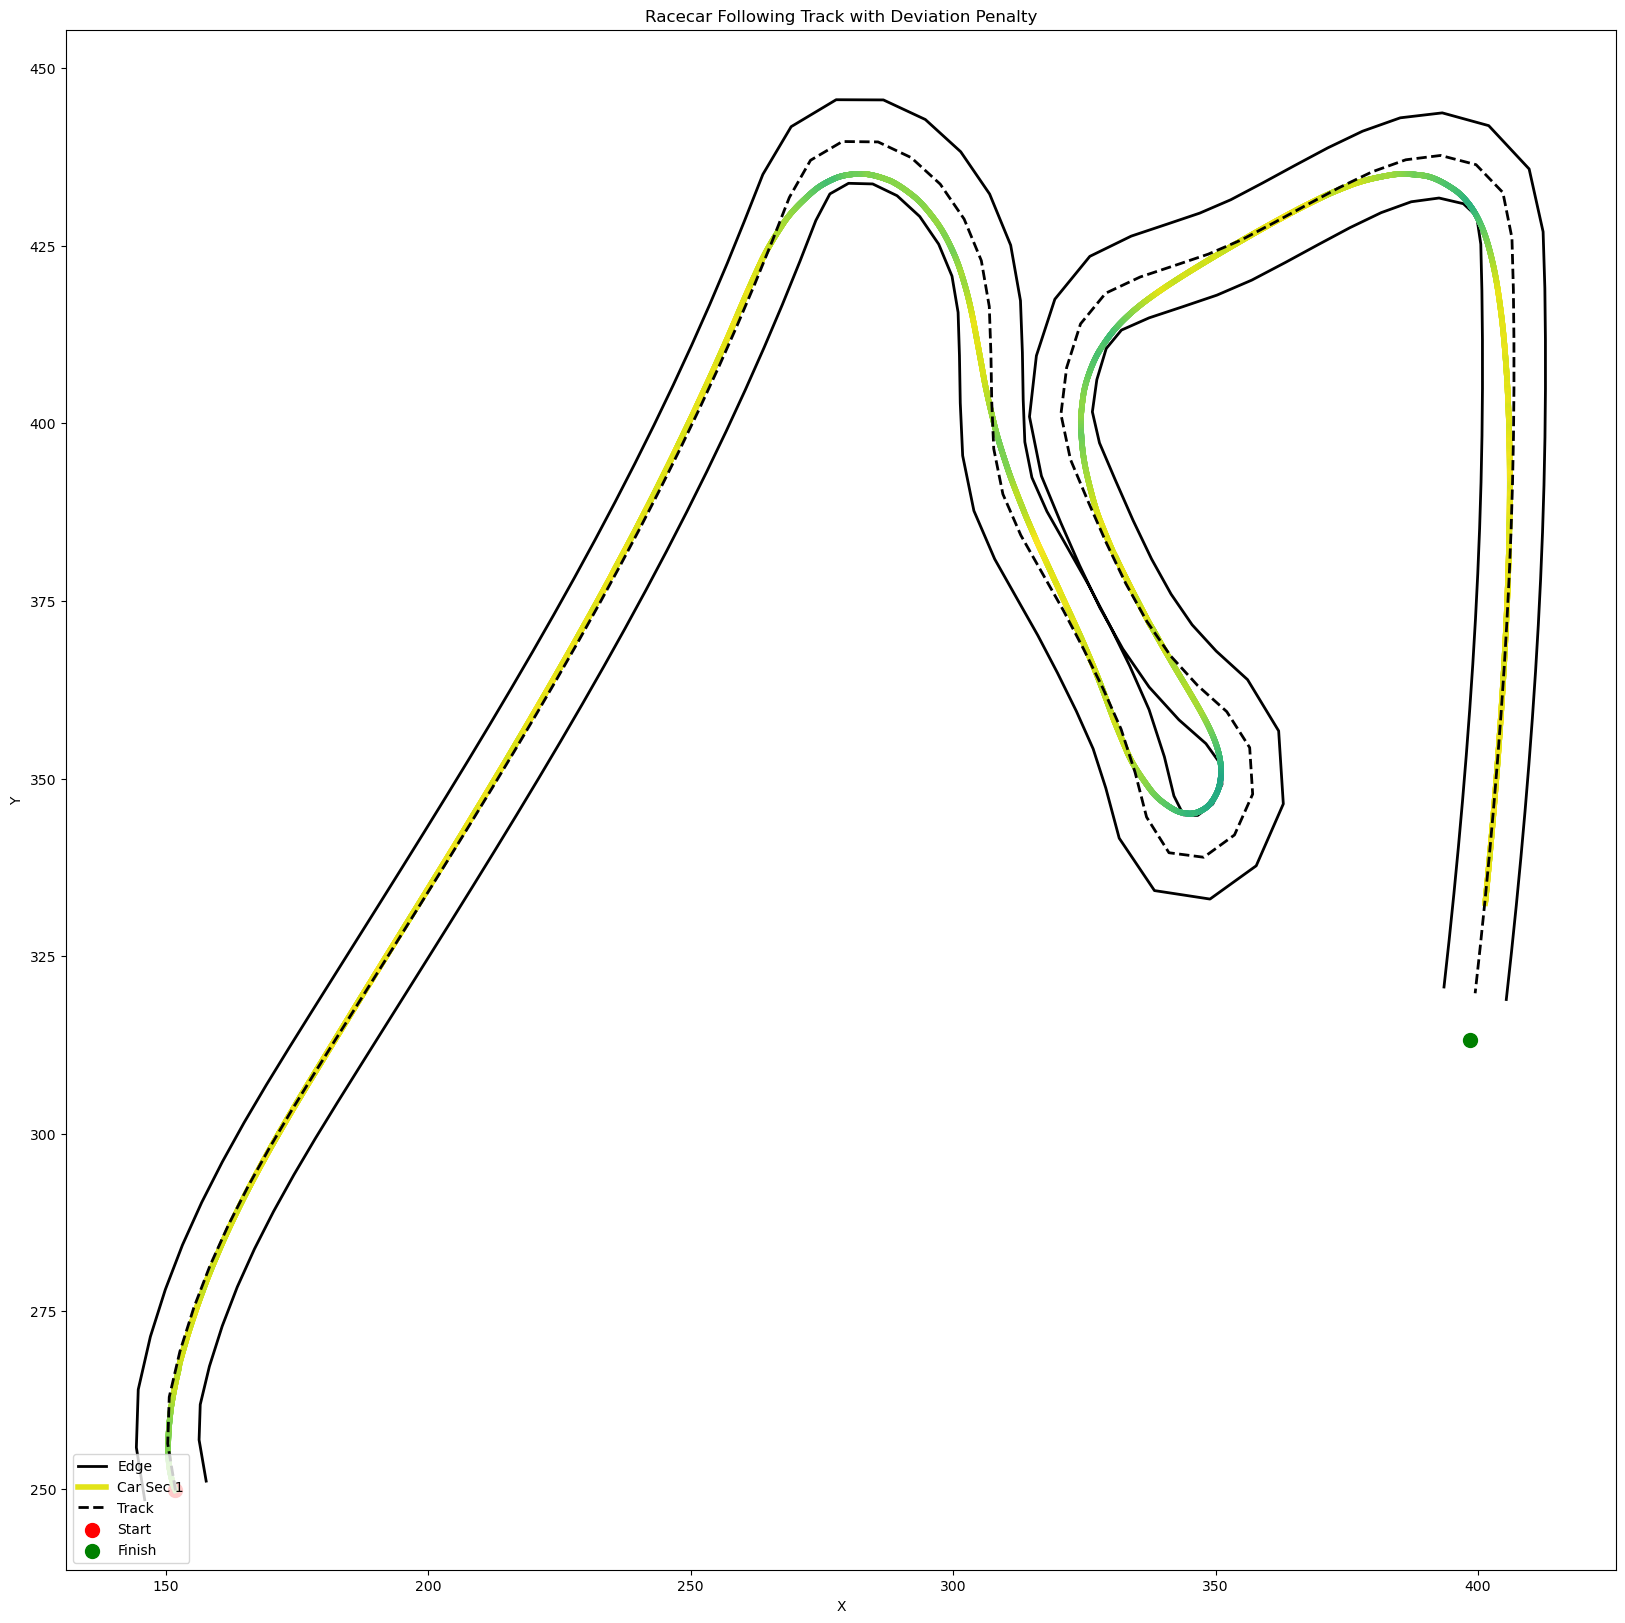

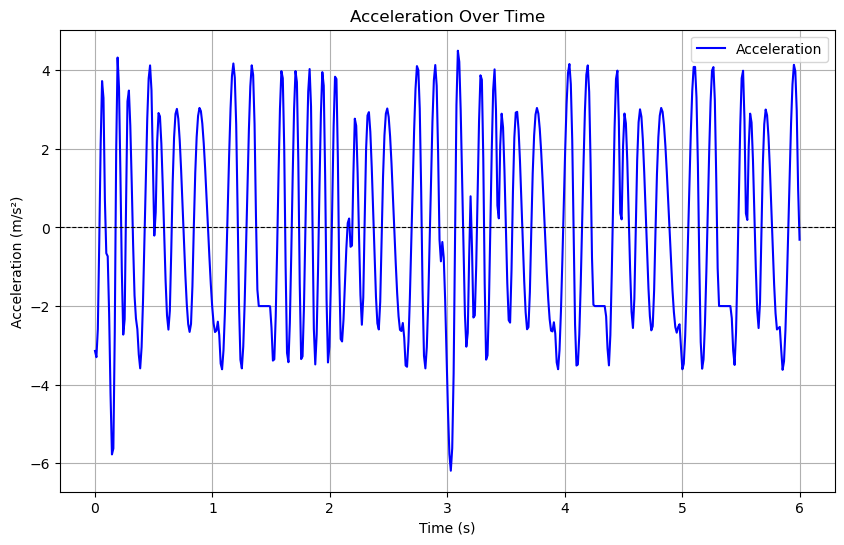

In [215]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp

# Define track (x_smooth, y_smooth)
start_x, end_x = 0, 100
t = np.linspace(0, 1, len(x_smooth[start_x:end_x]))
x_interp = interp1d(t, x_smooth[start_x:end_x], kind='cubic')
y_interp = interp1d(t, y_smooth[start_x:end_x], kind='cubic')


# Car parameters
L = 3  # Wheelbase
max_accel = 50 # Max acceleration
max_steer = np.radians(30)  # Max steering angle

def speed_control(x, y, v, base_accel=3.0):
    """
    Adjusts acceleration based on track curvature.

    Parameters:
        x, y: Current vehicle position.
        v: Current velocity.
        base_accel: Desired acceleration level.

    Returns:
        Adjusted acceleration.
    """
    t_vals = np.linspace(0, 1, 100)
    track_points = np.array([x_interp(t_vals), y_interp(t_vals)]).T
    distances = np.linalg.norm(track_points - np.array([x, y]), axis=1)
    closest_idx = np.argmin(distances)

    # Compute curvature (approximate)
    if closest_idx < len(t_vals) - 2:
        p1 = track_points[closest_idx]
        p2 = track_points[closest_idx + 1]
        p3 = track_points[closest_idx + 2]

        # Curvature formula: k = (dx * ddy - dy * ddx) / ((dx^2 + dy^2)^(3/2))
        dx = p2[0] - p1[0]
        dy = p2[1] - p1[1]
        ddx = p3[0] - 2 * p2[0] + p1[0]
        ddy = p3[1] - 2 * p2[1] + p1[1]

        curvature = abs(dx * ddy - dy * ddx) / (dx**2 + dy**2 + 1e-3)**(1.5)
    else:
        curvature = 0.0  # Straight line

    # Reduce acceleration when approaching high curvature
    max_speed = max(5.0, 12.0 - 50 * curvature)  # Slower in sharp turns

    if v > max_speed:
        return -2.0  # Brake if too fast
    else:
        return base_accel  # Accelerate normally

def stanley_controller(x, y, theta, v, lookahead=2, k=1.5, damping=0.1):
    """
    Stanley Controller for steering correction.
    
    Parameters:
        x, y: Current vehicle position.
        theta: Current vehicle heading angle.
        v: Current velocity.
        lookahead: Look-ahead distance for reference point.
        k: Gain factor for cross-track error correction.
    
    Returns:
        Steering angle delta
    """
    # Find the closest point on the track
    t_vals = np.linspace(0, 1, 100)
    track_points = np.array([x_interp(t_vals), y_interp(t_vals)]).T
    distances = np.linalg.norm(track_points - np.array([x, y]), axis=1, ord=2)
    closest_idx = np.argmin(distances)

    # Lookahead point
    lookahead_idx = min(closest_idx + lookahead, len(t_vals) - 1)
    target_x, target_y = track_points[lookahead_idx]

    # Compute cross-track error
    cross_track_error = (np.linalg.norm([target_x - x, target_y - y]) / 50) ** 2

    # Compute heading error
    track_heading = np.arctan2(target_y - y, target_x - x)
    heading_error = track_heading - theta

    # Stanley steering law
    delta = heading_error + np.arctan(k * cross_track_error / (v + 1e-3))
    delta = delta * (1 - damping * abs(delta))

    return np.clip(delta, -max_steer, max_steer)

# Define racecar dynamics
def racecar_dynamics(t, state, control_func, lookahead=2):
    x, y, v, theta = state
    a, delta = control_func(t, state, lookahead)  # Get control inputs

    dxdt = v * np.cos(theta)
    dydt = v * np.sin(theta)
    dvdt = np.clip(a, -max_accel, max_accel)  # Limit acceleration
    dthetadt = (v / L) * np.tan(np.clip(delta, -max_steer, max_steer))  # Steering dynamics
    
    return [dxdt, dydt, dvdt, dthetadt]


def hamiltonian(state, costate, control):
    """
    Compute the Hamiltonian for the system.

    Parameters:
        state: [x, y, v, theta]
        costate: [λ_x, λ_y, λ_v, λ_theta]
        control: [a, delta] (acceleration, steering angle)

    Returns:
        Hamiltonian value
    """
    x, y, v, theta = state
    λ_x, λ_y, λ_v, λ_theta = costate
    a, delta = control

    # Compute derivatives
    dxdt = v * np.cos(theta)
    dydt = v * np.sin(theta)
    dvdt = np.clip(a, -max_accel, max_accel)
    dthetadt = (v / L) * np.tan(np.clip(delta, -max_steer, max_steer))

    # Define Hamiltonian
    H = λ_x * dxdt + λ_y * dydt + λ_v * dvdt + λ_theta * dthetadt + 1  # "+1" to minimize time

    return H

# Control strategy with penalty for deviation
def control_func(t, state, lookahead=2):
    x, y, v, theta = state

    # Get smooth steering using damped Stanley Controller
    delta = stanley_controller(x, y, theta, v, lookahead=lookahead, k=1.2, damping=0.3)

    # Get acceleration based on curvature-aware speed control
    a = speed_control(x, y, v)
    # Compute costate variables (λ_x, λ_y, λ_v, λ_theta)
    λ_x = -2 * (x - x_interp(0.5))  # Example penalty for deviation from center
    λ_y = -2 * (y - y_interp(0.5))  # Example penalty for deviation from center
    λ_v = 0  # No penalty for velocity in this example
    λ_theta = 0  # No penalty for heading angle in this example

    # Compute Hamiltonian
    H = hamiltonian(state, [λ_x, λ_y, λ_v, λ_theta], [a, delta])
    # Penalize acceleration and steering angle in the Hamiltonian
    penalty_a = 0.1 * a**2  # Quadratic penalty for acceleration
    penalty_delta = 0.1 * delta**2  # Quadratic penalty for steering angle
    H += penalty_a + penalty_delta

    return a, delta


plt.figure(figsize=(20, 20))
#Plot the track
def compute_perpendiculars(x, y):
    dx = np.gradient(x)
    dy = np.gradient(y)
    lengths = np.sqrt(dx**2 + dy**2)
    dx /= lengths
    dy /= lengths
    px = -dy
    py = dx
    return px, py

px, py = compute_perpendiculars(x_smooth[start_x:end_x], y_smooth[start_x:end_x])
track_width = 12  # Adjust as needed
linewidth = 4
x_outer = x_smooth[start_x:end_x] + (track_width / 2) * px
y_outer =  y_smooth[start_x:end_x] + (track_width / 2) * py
x_inner = x_smooth[start_x:end_x] - (track_width / 2) * px
y_inner =  y_smooth[start_x:end_x] - (track_width / 2) * py
plt.plot(x_outer, y_outer, color='black', linewidth=2, label='Edge')
plt.plot(x_inner, y_inner, color='black', linewidth=2)

# Solve the system
len_of_systems = 6
t_span = [0, len_of_systems]
y0 = [x_smooth[start_x], y_smooth[start_x], 10.0, np.pi/1.5]  # Initial state (start at first track point)
sol = solve_ivp(racecar_dynamics, t_span, y0, args=(control_func, 2), t_eval=np.linspace(0, t_span[1], 500), method="RK45")
for j in range(len(sol.t) - 1):
        plt.plot(
            sol.y[0][j:j+2], sol.y[1][j:j+2],
            color=plt.cm.viridis(sol.y[2][j] / 12.5),  # Normalize velocity for color mapping
            linewidth=linewidth)

for i in range(8):
    t_span = [0, len_of_systems]
    y0 = [sol.y[0][-1], sol.y[1][-1], sol.y[2][-1], sol.y[3][-1]]  # Initial state (start at last point of previous segment)
    sol = solve_ivp(racecar_dynamics, t_span, y0, args=(control_func, 3), t_eval=np.linspace(0, t_span[1], 500), method="RK45")
    
    # Plot each segment with color based on velocity
    for j in range(len(sol.t) - 1):
        plt.plot(
            sol.y[0][j:j+2], sol.y[1][j:j+2],
            color=plt.cm.viridis(sol.y[2][j] / 12.5),  # Normalize velocity for color mapping
            linewidth=linewidth, label="Car Sec 1" if i == 0 and j == 0 else None
        )


# Plot the track and trajectory
plt.plot(x_smooth[start_x:end_x], y_smooth[start_x:end_x], '-', label='Track', linewidth=2, color='k', linestyle='--')
plt.scatter(x_smooth[start_x], y_smooth[start_x], color='red', s=100, label='Start')
plt.scatter(x_smooth[end_x], y_smooth[end_x], color='green', s=100, label='Finish')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Racecar Following Track with Deviation Penalty")
plt.legend(loc='lower left')

plt.show()

# Extract acceleration (dv/dt) from the solution
time = sol.t
velocity = sol.y[2]
acceleration = np.gradient(velocity, time)

# Plot acceleration over time
plt.figure(figsize=(10, 6))
plt.plot(time, acceleration, label="Acceleration", color="blue")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s²)")
plt.title("Acceleration Over Time")
plt.legend()
plt.grid()
plt.show()